In [1]:
%load_ext autoreload
%autoreload 2

# Synthetic Data

## Generate

In [2]:
from faim.data_preparation.synthetic import NormalSyntheticGroupedDatasetBuilder
import numpy as np
from numpy.random import PCG64, Generator


random_generator = Generator(PCG64(4))
group_names=["privileged", "disadvantaged"]
synth_data_builder = NormalSyntheticGroupedDatasetBuilder(
    group_names=group_names,
    n_by_group=[50000, 50000],
    truth_prediction_means_by_group=[np.array([1, 2]), np.array([-1, -3]),],
    truth_prediction_correlation_matrixs_by_group=[
        np.array([[1, 0.8], [0.8, 1]]),
        np.array([[1, 0.8], [0.8, 1]]),
    ],
    random_generator=random_generator
)
synth_data = synth_data_builder.build()
synth_data.head()

,uuid,group,true_score,pred_score,true_label,pred_label
37946,238560605319939107639009844201846237808,0,0.897985,1.856003,1,1
4589,17221012628239116462977387993274920339,1,-0.221229,-2.008019,0,0
3166,163101747536709045710105849009545766998,0,2.361094,3.257432,1,1
17204,227216863619154909738937490524934030808,1,-0.124138,-2.095224,0,0
46899,12950211082233939159654516916164266695,1,-1.730384,-3.377135,0,0


## Figure 1

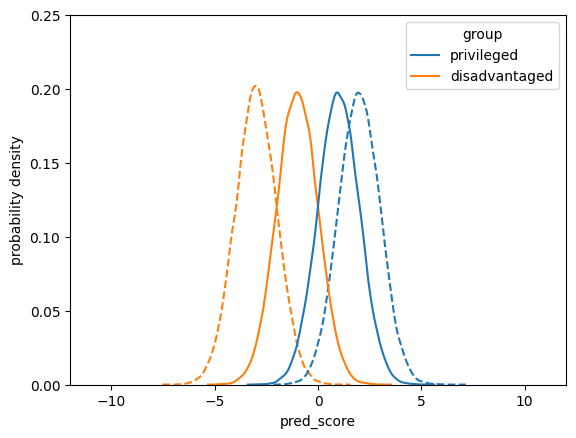

In [3]:
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt

sns.color_palette("tab10")

plot_data = deepcopy(synth_data)
plot_data["group"] = plot_data.group.map(lambda idx: group_names[idx])

fig, ax = plt.subplots()
sns.kdeplot(data=plot_data, x="pred_score", hue="group", linestyle="--", ax=ax)
sns.kdeplot(data=plot_data, x="true_score", hue="group", linestyle="-", ax=ax)
_ = ax.set_ylabel("probability density")
_ = ax.set_xlim([-12, 12])
_ = ax.set_ylim([0, 0.25])

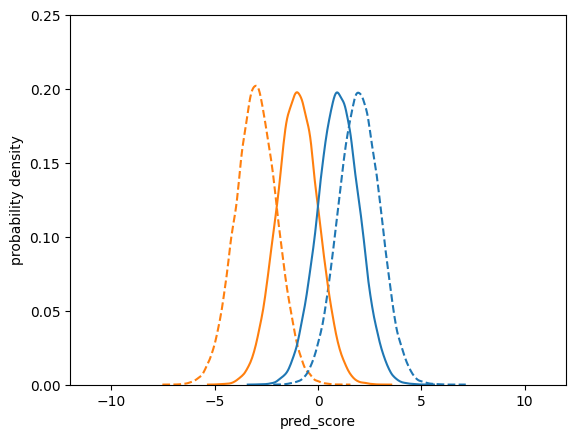

In [4]:
ax.get_legend().remove()
fig

In [5]:
fig.savefig("figures/figure1.svg", format="svg")

## Figure 2